In [22]:
import einsteinpy as ep

In [23]:
ep?

Type:        module
String form: <module 'einsteinpy' from '/opt/anaconda3/lib/python3.8/site-packages/einsteinpy/__init__.py'>
File:        /opt/anaconda3/lib/python3.8/site-packages/einsteinpy/__init__.py
Docstring:  
einsteinpy

Python for General Relativity


In [24]:
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols,\
RiemannCurvatureTensor,EinsteinTensor,RicciScalar,RicciTensor,StressEnergyMomentumTensor

In [25]:
from itertools import product
from IPython.display import display, Math
from sympy import symbols, latex, lambdify, Matrix

In [26]:
import sympy
from einsteinpy.symbolic.predefined import Schwarzschild

sympy.init_printing()

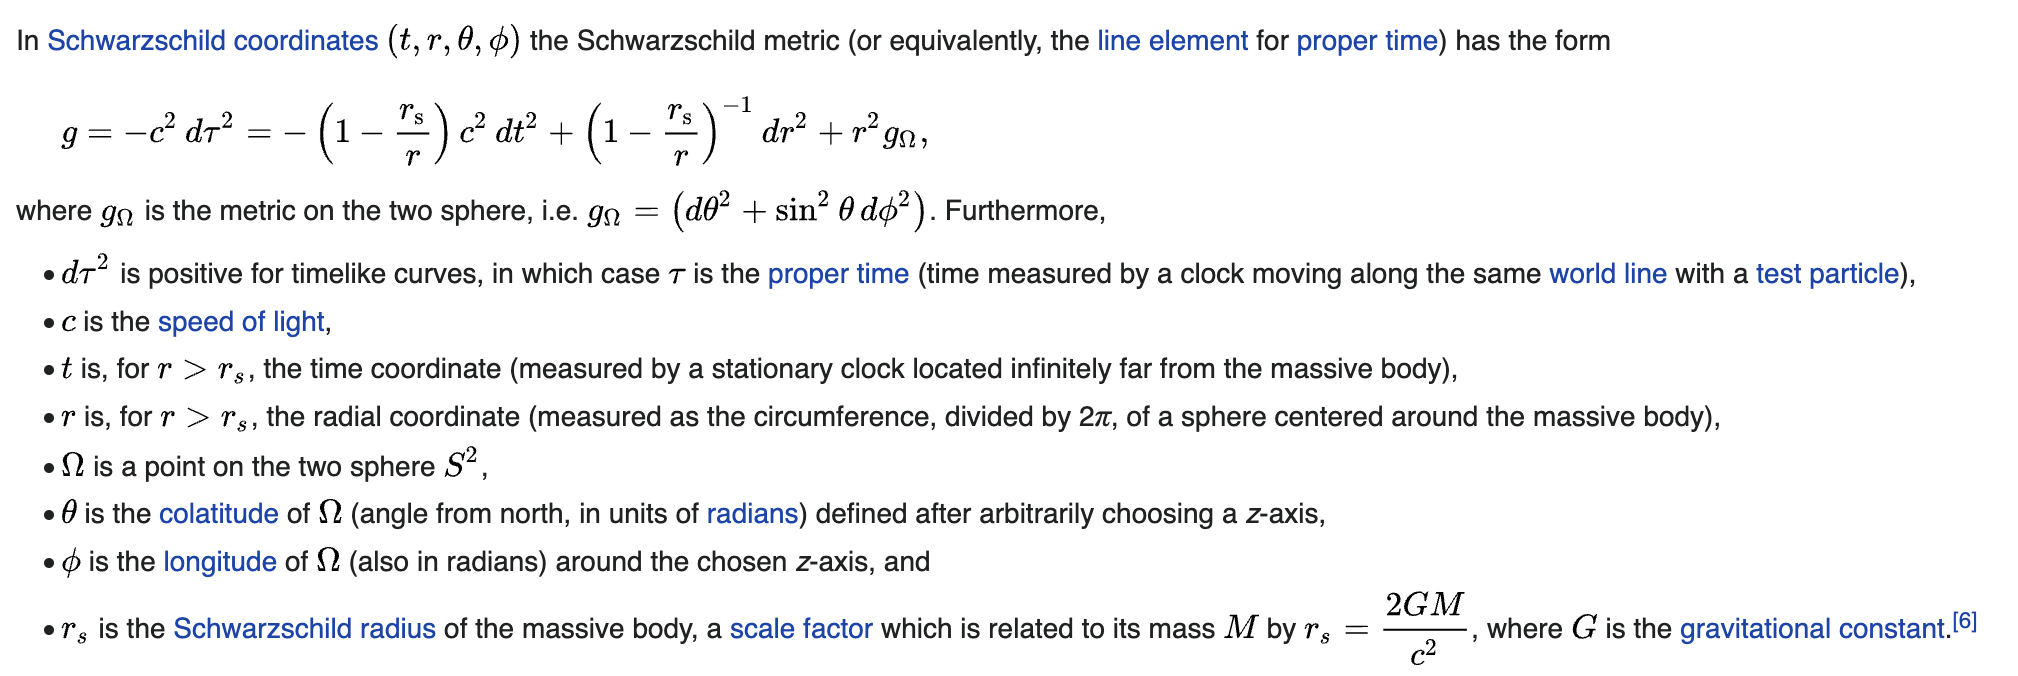

Wikipedia link - https://en.wikipedia.org/wiki/Schwarzschild_metric

#  Schwarzschild metric

In [27]:
sch = Schwarzschild()
sch.tensor()

⎡    rₛ                                 ⎤
⎢1 - ──       0        0         0      ⎥
⎢    r                                  ⎥
⎢                                       ⎥
⎢            -1                         ⎥
⎢  0     ───────────   0         0      ⎥
⎢         2 ⎛    rₛ⎞                    ⎥
⎢        c ⋅⎜1 - ──⎟                    ⎥
⎢           ⎝    r ⎠                    ⎥
⎢                                       ⎥
⎢                       2               ⎥
⎢                     -r                ⎥
⎢  0          0       ────       0      ⎥
⎢                       2               ⎥
⎢                      c                ⎥
⎢                                       ⎥
⎢                             2    2    ⎥
⎢                           -r ⋅sin (θ) ⎥
⎢  0          0        0    ────────────⎥
⎢                                 2     ⎥
⎣                                c      ⎦

In [32]:
for  j, k in product(range(4), range(4)):
    if sch[j, k] != 0:
        display(Math(f'g_{{{j}{k}}} = ' + latex(sch[j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
sch_inv = sch.inv()
sch_inv.tensor()

⎡  r                                   ⎤
⎢──────       0         0        0     ⎥
⎢r - rₛ                                ⎥
⎢                                      ⎥
⎢         2                            ⎥
⎢        c ⋅(-r + rₛ)                  ⎥
⎢  0     ────────────   0        0     ⎥
⎢             r                        ⎥
⎢                                      ⎥
⎢                        2             ⎥
⎢                      -c              ⎥
⎢  0          0        ────      0     ⎥
⎢                        2             ⎥
⎢                       r              ⎥
⎢                                      ⎥
⎢                                 2    ⎥
⎢                               -c     ⎥
⎢  0          0         0    ──────────⎥
⎢                             2    2   ⎥
⎣                            r ⋅sin (θ)⎦

In [33]:
for  j, k in product(range(4), range(4)):
    if sch_inv[j, k] != 0:
        display(Math(f'g^{{{j}{k}}} = ' + latex(sch_inv[j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Christoffel Symbols ( $\Gamma^{\lambda}_{\mu\nu}$ )

In [29]:
ch = ChristoffelSymbols.from_metric(sch) # can be initialized from sch also
chr.tensor()

⎡                                      ⎡    ⎛   2       2⎞                    
⎢                                      ⎢    ⎜  c    rₛ⋅c ⎟                    
⎢                                      ⎢-rₛ⋅⎜- ── + ─────⎟                    
⎢                                      ⎢    ⎝  2     2⋅r ⎠                    
⎢                                      ⎢───────────────────          0        
⎢                                      ⎢          2                           
⎢                                      ⎢         r                            
⎢                                      ⎢                                      
⎢                                      ⎢                        ⎛   2       2⎞
⎢⎡                     rₛ           ⎤  ⎢                        ⎜  c    rₛ⋅c ⎟
⎢⎢      0        ─────────────  0  0⎥  ⎢                     rₛ⋅⎜- ── + ─────⎟
⎢⎢                  2 ⎛    rₛ⎞      ⎥  ⎢                        ⎝  2     2⋅r ⎠
⎢⎢               2⋅r ⋅⎜1 - ──⎟      ⎥  ⎢         0  

In [30]:
for i, j, k in product(range(4), range(4), range(4)):
    if ch[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j},{k}}} = ' + latex(ch[i, j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Riemann Tensor ($R^{\lambda}_{\mu\nu\gamma}$)

In [31]:
rm = RiemannCurvatureTensor.from_metric(sch)
rm.tensor()

⎡                                           ⎡                  rₛ          ⎤  
⎢                                           ⎢     0       ───────────  0  0⎥  
⎢                                           ⎢              2               ⎥  
⎢             ⎡0  0  0  0⎤                  ⎢             r ⋅(r - rₛ)      ⎥  
⎢             ⎢          ⎥                  ⎢                              ⎥  
⎢             ⎢0  0  0  0⎥                  ⎢    -rₛ                       ⎥  
⎢             ⎢          ⎥                  ⎢───────────       0       0  0⎥  
⎢             ⎢0  0  0  0⎥                  ⎢ 2                            ⎥  
⎢             ⎢          ⎥                  ⎢r ⋅(r - rₛ)                   ⎥  
⎢             ⎣0  0  0  0⎦                  ⎢                              ⎥  
⎢                                           ⎢     0            0       0  0⎥  
⎢                                           ⎢                              ⎥  
⎢                                           ⎣     0 

In [34]:
for i, j, k, p in product(range(4), range(4), range(4),range(4)):
    if rm[i, j, k, p] != 0:
        display(Math(f'R^{i}_{{{j}{k}{p}}} = ' + latex(rm[i, j, k,p])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Tensor ($R_{\mu\nu}$)  

In [35]:
R_tensor = RicciTensor.from_metric(sch)
R_tensor.tensor()

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

# Ricci Scalar ($R$)

In [36]:
R_scalar = RicciScalar.from_metric(sch)
R_scalar.simplify()
R_scalar.expr

# EinsteinTensor ($G_{\mu\nu}$)

In [37]:
einst = EinsteinTensor.from_metric(sch)
einst.tensor()

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

# Stress Energy Momentum Tensor ($T_{\mu\nu}$)

In [38]:
T = StressEnergyMomentumTensor.from_metric(sch)
T.tensor()

⎡                       4 ⎛    rₛ⎞                                            
⎢-0.0397887357729738⋅Λ⋅c ⋅⎜1 - ──⎟                                            
⎢                         ⎝    r ⎠                                            
⎢──────────────────────────────────             0                         0   
⎢                G                                                            
⎢                                                                             
⎢                                                          2                  
⎢                                    0.0397887357729738⋅Λ⋅c                   
⎢                0                   ───────────────────────              0   
⎢                                             ⎛    rₛ⎞                        
⎢                                           G⋅⎜1 - ──⎟                        
⎢                                             ⎝    r ⎠                        
⎢                                                   

In [40]:
for i, j in product(range(4), range(4)):
    if T[i, j] != 0:
        display(Math(f'T_{{{i}{j}}} = ' + latex(T[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>